In [1]:
import xarray as xr
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'cl_RF_PCp_20200506.txt'

In [3]:
import csv
with open(filename, 'r') as f:
#     content = csv.reader(f, delimiter=',')
#     first_row = [column[0] for column in csv.reader(f,delimiter='\t')]
    all_data = [line.strip() for line in f.readlines()]
    height_line = all_data[:6]
    data = all_data[7:]
    

In [4]:
len(data)

3733

In [5]:
new_row = [[float (element) for element in row.split(',')] for row in data]
import numpy as np
new_data = np.array(new_row)

In [6]:
new_data.shape

(3733, 3)

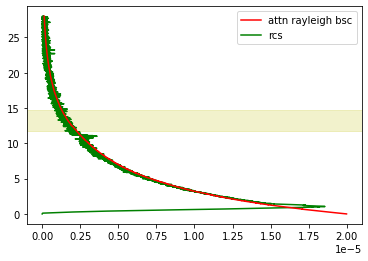

In [15]:
fig, ax = plt.subplots()
ax.plot(new_data[:,1], new_data[:,0], color='r', label='attn rayleigh bsc', zorder=10)
ax.axhspan(11.76, 14.78, color='y', alpha=0.2)
ax.plot(new_data[:,2]*0.8e-13, new_data[:,0], color='g', label='rcs')
ax.legend()

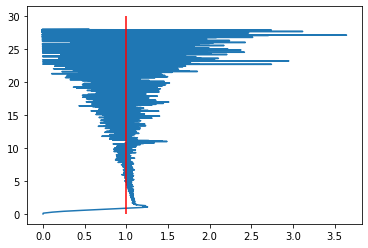

In [19]:
sr = new_data[:,2]*0.85e-13/new_data[:,1]
fig, ac = plt.subplots()
ac.plot(sr, new_data[:,0])
ac.vlines(1, 0, 30, 'r', zorder=10)

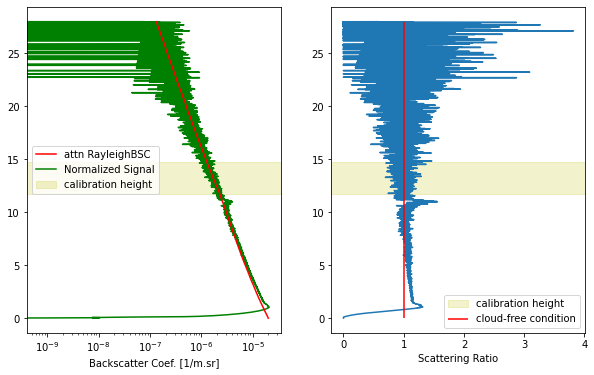

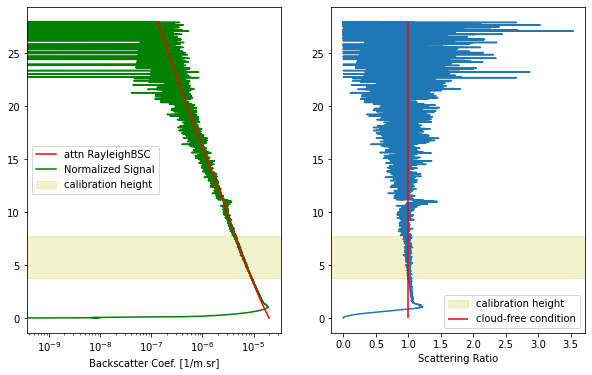

In [47]:
#lower and upper Rayleigh height mimits = 11.76, 14.78
idx = (new_data[:,0] >= 11.76) & (new_data[:,0] <= 14.78)
const = np.mean(new_data[idx,1])/np.mean(new_data[idx,2])
fig, (ax, ax2) = plt.subplots(figsize=[10,6], nrows=1, ncols=2)
ax.semilogx(new_data[:,1], new_data[:,0], color='r', label='attn RayleighBSC', zorder=10)
ax.axhspan(11.76, 14.78, color='y', alpha=0.2, label='calibration height')
ax.semilogx(new_data[:,2]*const, new_data[:,0], color='g', label='Normalized Signal')
ax.legend()
ax.set(xlabel='Backscatter Coef. [1/m.sr]')
sr = new_data[:,2]*const/new_data[:,1]
ax2.plot(sr, new_data[:,0])
ax2.vlines(1, 0, new_data[:,0].max(), 'r', zorder=10, label='cloud-free condition')
ax2.set(xlabel='Scattering Ratio')
ax2.axhspan(11.76, 14.78, color='y', alpha=0.2, label='calibration height')
ax2.legend()



#lower and upper Rayleigh height mimits = 5 et 10km
idx = (new_data[:,0] >= 3.76) & (new_data[:,0] <= 7.78)
const = np.mean(new_data[idx,1])/np.mean(new_data[idx,2])
fig, (ax, ax2) = plt.subplots(figsize=[10,6], nrows=1, ncols=2)
ax.semilogx(new_data[:,1], new_data[:,0], color='r', label='attn RayleighBSC', zorder=10)
ax.axhspan(3.76, 7.78, color='y', alpha=0.2, label='calibration height')
ax.semilogx(new_data[:,2]*const, new_data[:,0], color='g', label='Normalized Signal')
ax.legend()
ax.set(xlabel='Backscatter Coef. [1/m.sr]')
sr = new_data[:,2]*const/new_data[:,1]
ax2.plot(sr, new_data[:,0])
ax2.vlines(1, 0, new_data[:,0].max(), 'r', zorder=10, label='cloud-free condition')
ax2.set(xlabel='Scattering Ratio')
ax2.axhspan(3.76, 7.78, color='y', alpha=0.2, label='calibration height')
ax2.legend()




In [64]:
#moyenner verticalement 30m
rcs_Av30 = np.mean(np.reshape(new_data[:3732], (int(new_data.shape[0]/4), 3, 4)), axis=2)


[ 1.59869550e-03  4.77526688e+03  2.07332819e+04  6.30550469e+04
  4.20775062e+05  1.63517508e+06  2.65475009e+06  3.71625011e+06
  4.95650012e+06  6.25650014e+06  7.68225015e+06  9.25325017e+06
  1.09007502e+07  1.27795002e+07  1.48722502e+07  1.69815002e+07
  1.93335002e+07  2.15762503e+07  2.41600003e+07  2.65975003e+07
  2.91525003e+07  3.16500003e+07  3.42350003e+07  3.68225003e+07
  3.93425004e+07  4.14225004e+07  4.36900004e+07  4.59850004e+07
  4.80025004e+07  4.99225004e+07  5.22975005e+07  5.39350005e+07
  5.54900005e+07  5.64750005e+07  5.70450005e+07  5.80200005e+07
  5.74475005e+07  5.61775006e+07  5.60125006e+07  5.43175006e+07
  5.35950006e+07  5.39775006e+07  5.36650006e+07  5.26950006e+07
  5.06775007e+07  4.94850007e+07  4.82800007e+07  4.75475007e+07
  4.68050007e+07  4.62100007e+07  4.61100008e+07  4.57600008e+07
  4.53550008e+07  4.46175008e+07  4.45000008e+07  4.43350008e+07
  4.30725008e+07  4.35625009e+07  4.27225009e+07  4.29700009e+07
  4.27050009e+07  4.26125

In [79]:
z30 = np.mean(np.reshape(new_data[:3732,0], (-1,12)), axis=1)
attnRBSC30 = np.mean(np.reshape(new_data[:3732,1], (-1,12)), axis=1)
rcs30 = np.mean(np.reshape(new_data[:3732,2], (-1,12)), axis=1)

8.201387307446693e-14


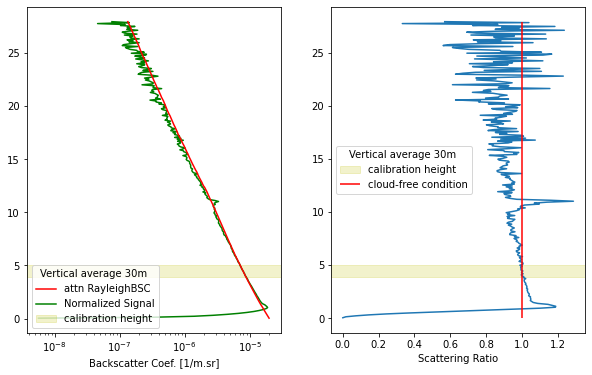

In [103]:
#lower and upper Rayleigh height mimits = 11.76, 14.78
ztop = 5
zbottom = 3.9
idx = (z30 > zbottom) & (z30 < ztop)
const = np.mean(attnRBSC30[idx])/np.mean(rcs30[idx])
print(const)
fig, (ax, ax2) = plt.subplots(figsize=[10,6], nrows=1, ncols=2)
ax.semilogx(attnRBSC30, z30, color='r', label='attn RayleighBSC', zorder=10)
ax.axhspan(zbottom, ztop, color='y', alpha=0.2, label='calibration height')
ax.semilogx(rcs30*const, z30, color='g', label='Normalized Signal')
leg = ax.legend(loc='lower left')
leg.set_title('Vertical average 30m ')
ax.set(xlabel='Backscatter Coef. [1/m.sr]')
sr = rcs30*const/attnRBSC30
ax2.plot(sr, z30)
ax2.vlines(1, 0, z30.max(), 'r', zorder=10, label='cloud-free condition')
ax2.set(xlabel='Scattering Ratio')
ax2.axhspan(zbottom, ztop, color='y', alpha=0.2, label='calibration height')
leg = ax2.legend()
leg.set_title('Vertical average 30m ')



In [7]:
new_data[:,0]

array([0.0000e+00, 7.5000e-03, 1.5000e-02, ..., 2.7975e+01, 2.7983e+01,
       2.7990e+01])

### RECUPERATION WMO RADIOSONDE 

In [9]:
wmofilename = 'WMO-Radiosonde-Nimes-20200506-00UTC'
wmofile = open(wmofilename, 'r')

In [15]:
import csv
with open(wmofilename, 'r') as f:
#     content = csv.reader(f, delimiter=',')
#     first_row = [column[0] for column in csv.reader(f,delimiter='\t')]
    all_data = [line.strip() for line in f.readlines()]
    height_line = all_data[0]
    
wmodata = np.array(all_data[1:])

In [50]:
(wmodata[0].split('-9999')[:])


['21 ', ' 100800B', '   188B', '    49    10    90']